# Tabular Kaggle Project

Guideline for steps for the Kaggle Tabular Project. You will "turn in" a GitHub repository, modeled after [Project Template](https://github.com/UTA-DataScience/ProjectTempate) on the day of the final, Wednesday, Dec 11 at 11 – 1:30 p.m. During the final period we will have about 5 minutes to go over your project and your results.

You can find a list of possible Tabular datasets here on [Excel File in Teams](https://mavsuta.sharepoint.com/:x:/r/teams/Course_2248_data_3402_001-cU7MvhRPSj18z/Shared%20Documents/General/TabularDatasets.xlsx?d=w42833a75094b46a7999548e06732a890&csf=1&web=1&e=seoB4p). You are not limited to these datasets. If you find a Kaggle challenge not listed that you would like to attempt, please go check with Dr. Farbin to make sure it is viable.

This notebook outlines the steps you should follow. The file(s) in the GitHub repository should contain these steps. Note that you will be only considering classification projects.

## Define Project

* Provide Project link.
* Short paragraph describing the challenge.
* Briefly describe the data.


Project link: https://www.kaggle.com/competitions/widsdatathon2024-challenge1/rules

Paragraph: The task is to predict whether a tumor is malignant or benign (metastatic cancer diagnosis) based on a set of features. This is a binary classification problem where the goal is to use the provided features to classify the tumors accurately.
Data Description:  We are using a real-world evidence dataset from Health Verity (HV), one of the largest healthcare data ecosystems in the US, as the main data source . The features include patient ID,patient race, patient age and patient gender and bmi.

## Data Loading and Initial Look

* Load the data.
* Count the number of rows (data points) and features.
* Any missing values?
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values?
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [9]:
from google.colab import files

uploaded=files.upload()


Saving train.csv to train.csv


In [10]:
import pandas as pd

# Assuming the dataset is a CSV file
df = pd.read_csv("train.csv")

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from google.colab import files

uploaded=files.upload()


Saving test.csv to test.csv


In [3]:
import pandas as pd

# Assuming the dataset is a CSV file
df = pd.read_csv("test.csv")

# Display the first few rows of the dataset
df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,B,B,B,C,B,B,A,E,E,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,A,B,A,C,B,C,A,E,C,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,B,A,A,A,B,B,A,E,D,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,B,B,A,C,B,D,A,E,A,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,B,B,A,C,B,C,A,E,C,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


In [4]:
# Count the number of rows and features
df.shape


(200000, 25)

In [5]:
# Check for missing values in each column
df.isnull().sum()


,0
id,0
cat0,0
cat1,0
cat2,0
cat3,0
cat4,0
cat5,0
cat6,0
cat7,0
cat8,0


In [6]:
# Creating a summary table for features
feature_info = {
    "Feature": df.columns,
    "Type": ["Categorical" if df[col].dtype == 'object' else "Numerical" for col in df.columns],
    "Value Range / Categories": [df[col].unique() if df[col].dtype == 'object' else df[col].describe() for col in df.columns],
    "Missing Values": [df[col].isnull().sum() for col in df.columns]
}

# Convert into a DataFrame for better visualization
feature_table = pd.DataFrame(feature_info)
feature_table


,Feature,Type,Value Range / Categories,Missing Values
0,id,Numerical,count 200000.000000 mean 249970.884580 ...,0
1,cat0,Categorical,"[B, A]",0
2,cat1,Categorical,"[B, A]",0
3,cat2,Categorical,"[B, A]",0
4,cat3,Categorical,"[C, A, D, B]",0
5,cat4,Categorical,"[B, C, D, A]",0
6,cat5,Categorical,"[B, C, D, A]",0
7,cat6,Categorical,"[A, B, C, I, D, H, E, G]",0
8,cat7,Categorical,"[E, G, B, D, F, A, C, I]",0
9,cat8,Categorical,"[E, C, D, A, G, F, B]",0


An outlier is an observation or data point that significantly differs from other observations in a dataset.

In [10]:
# Check the column names of the dataset
print(df.columns)


Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13'],
      dtype='object')


In [11]:
# Strip any leading/trailing spaces in the column names
df.columns = df.columns.str.strip()

# Check again for the presence of the 'signal' column
print(df.columns)


Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13'],
      dtype='object')


In [13]:
import numpy as np
from scipy import stats

# Calculate Z-scores for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
z_scores = stats.zscore(df[numerical_cols].dropna())

# Define a threshold for outliers (usually 3 or higher)
outliers = np.abs(z_scores) > 3
print(outliers)


           id  cont0  cont1  cont2  cont3  cont4  cont5  cont6  cont7  cont8  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
199995  False  False  False  False  False  False  False  False  False  False   
199996  False  False  False  False  False  False  False  False  False  False   
199997  False  False  False  False  False  False  False  False  False  False   
199998  False  False  False  False  False  False  False  False  False  False   
199999  False  False  False  False  False  False  False  False  False  False   

        cont9  cont10  cont11  cont12  

In [18]:
# Check all column names again
print(df.columns)

# Check the data types of each column to see if there are any categorical columns
print(df.dtypes)

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13'],
      dtype='object')
id          int64
cat0       object
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cont0     float64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
cont11    float64
cont12    float64
cont13    float64
dtype: object


In [19]:
# Assuming 'cat0' is the target column
class_distribution = df['cat0'].value_counts()
print(class_distribution)

cat0
A    128830
B     71170
Name: count, dtype: int64


## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression:
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

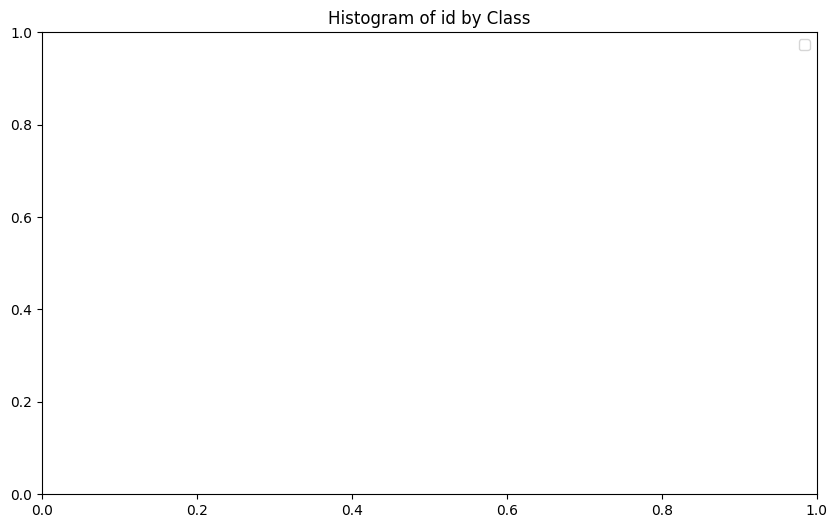

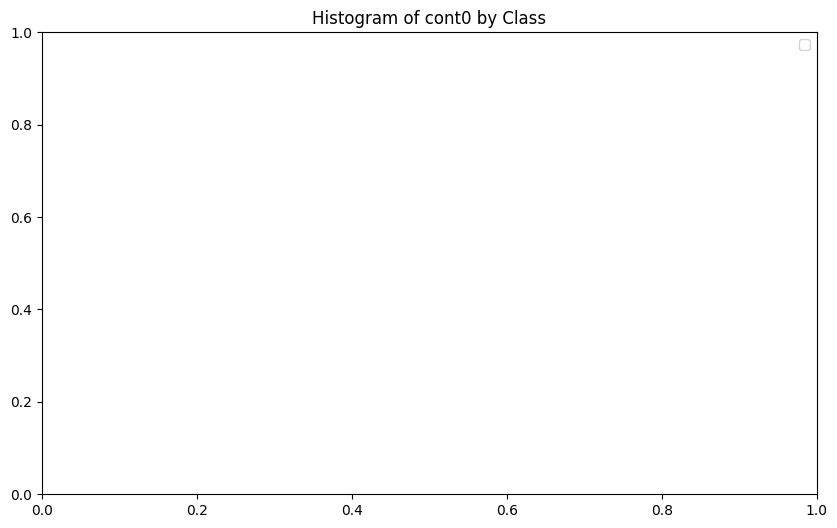

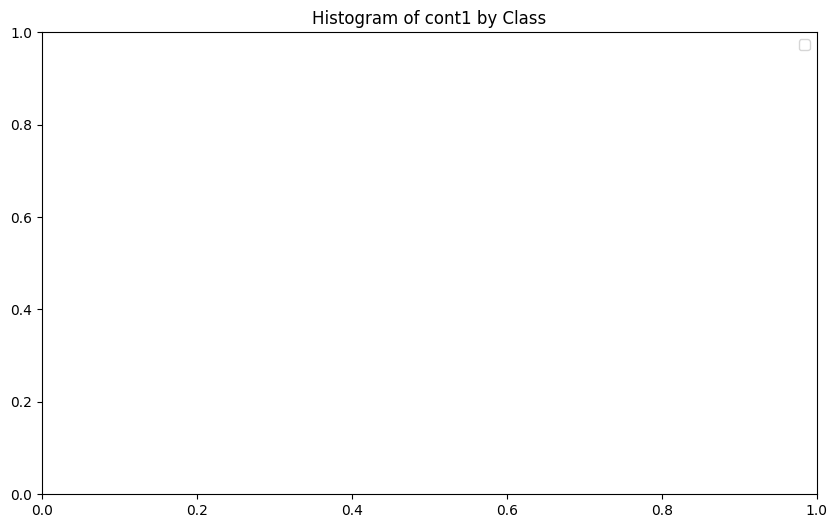

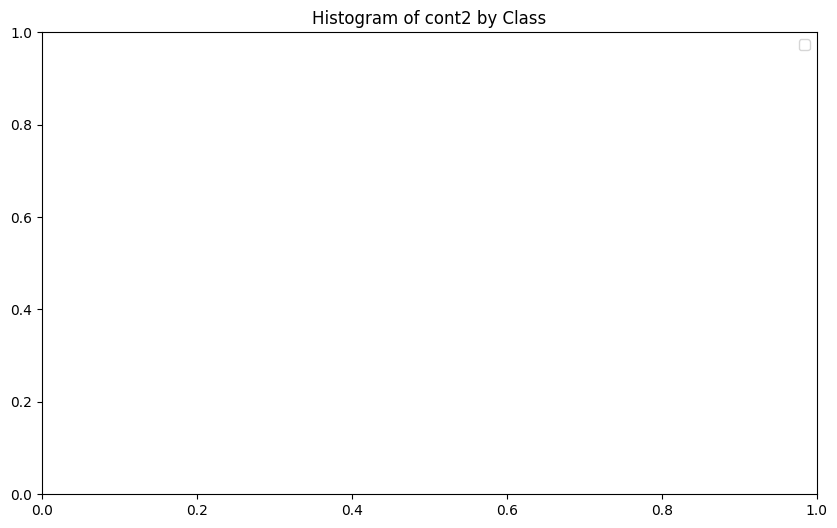

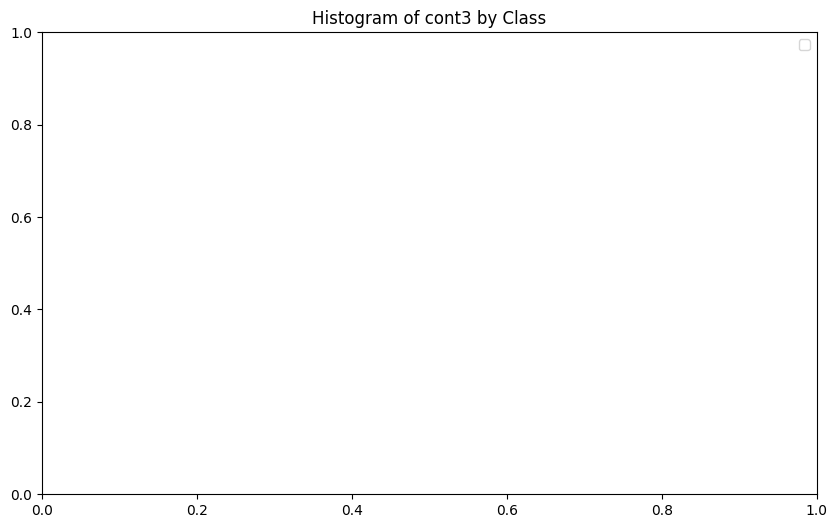

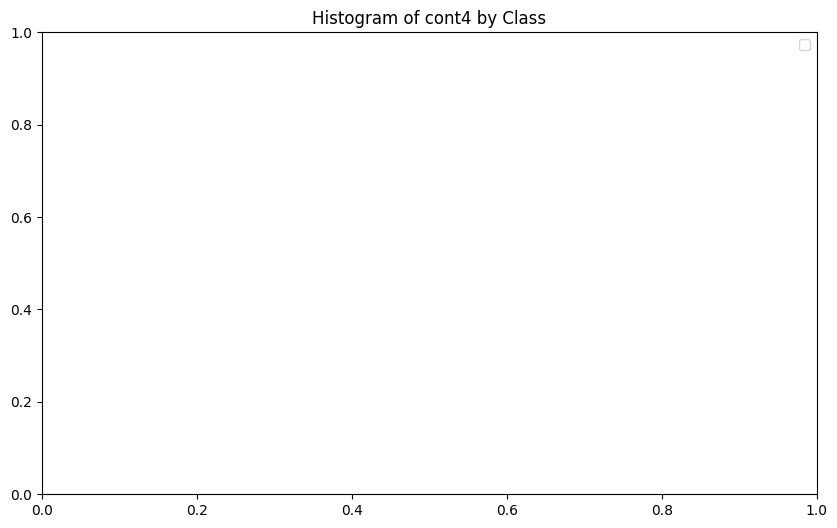

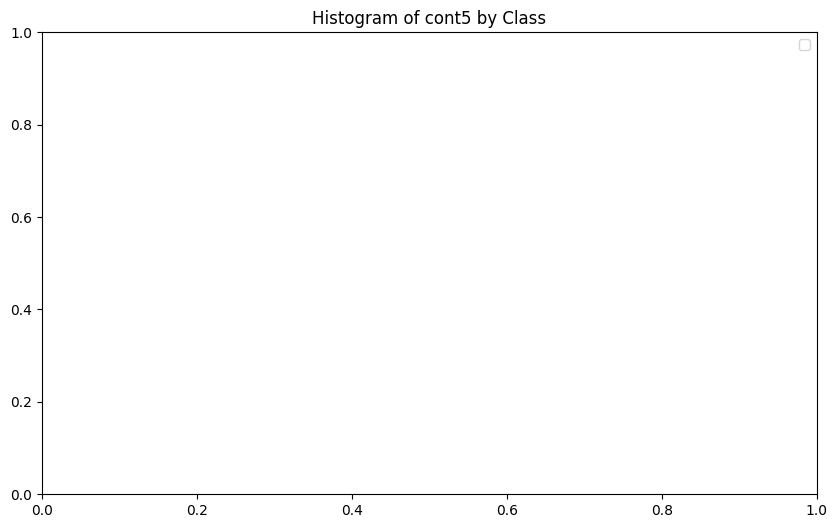

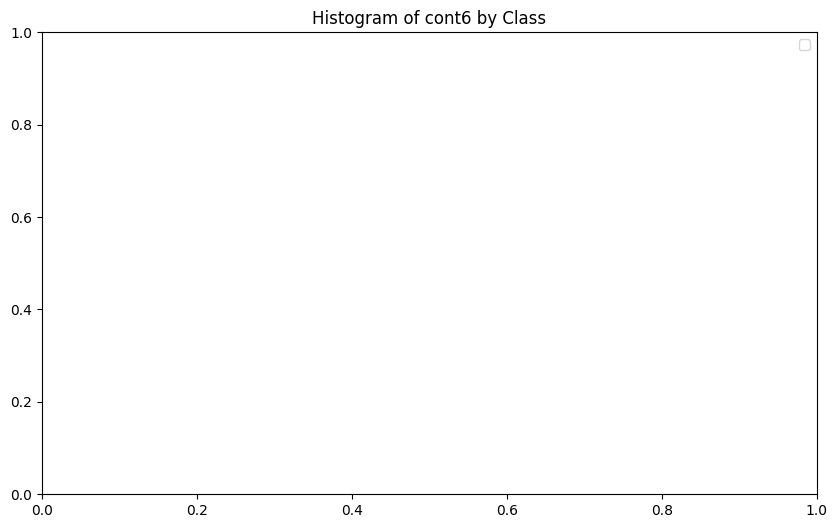

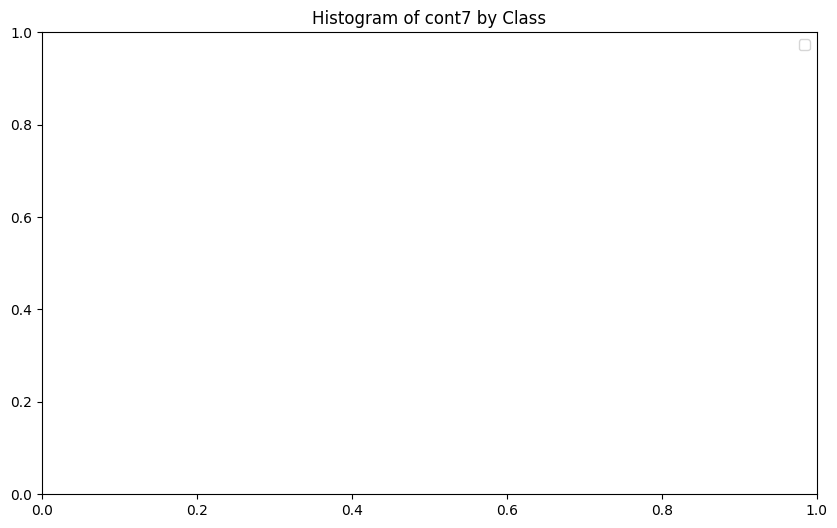

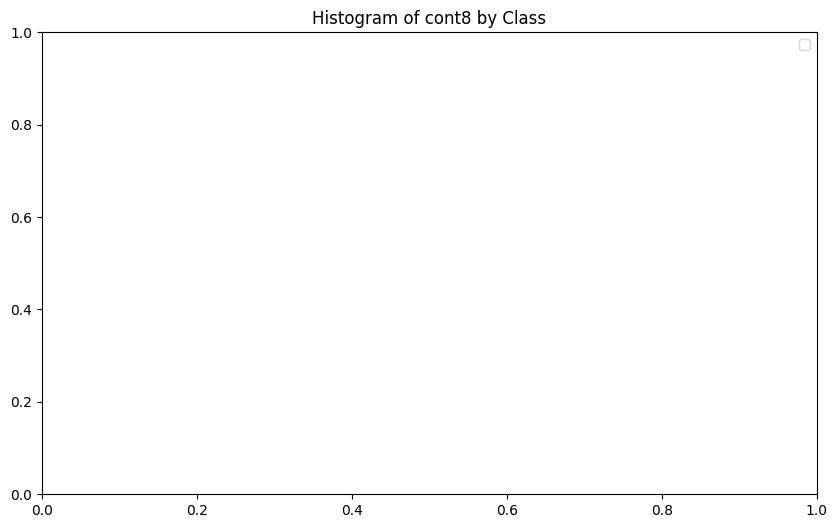

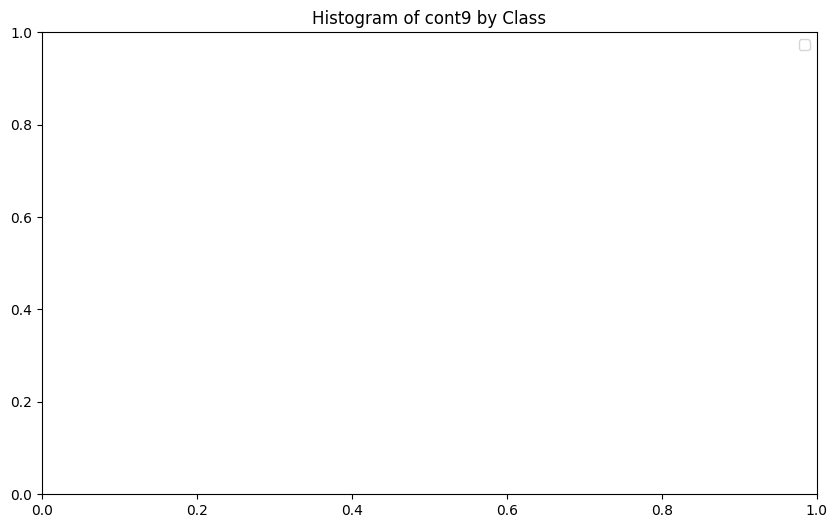

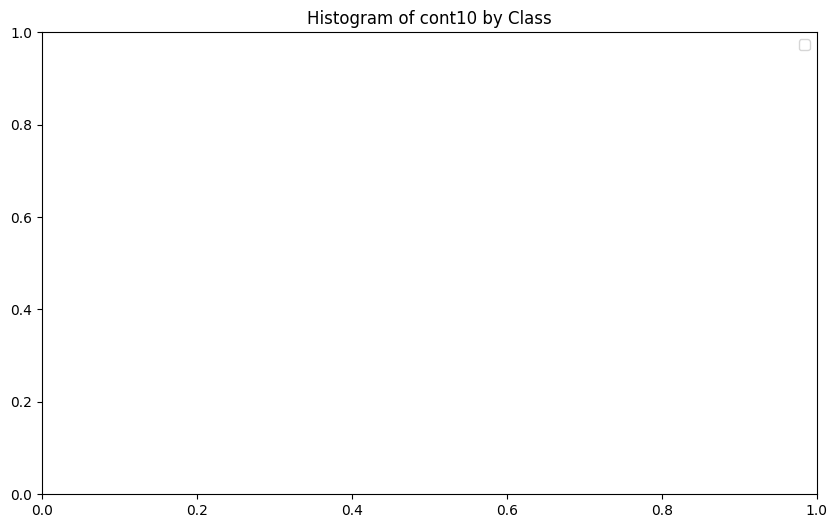

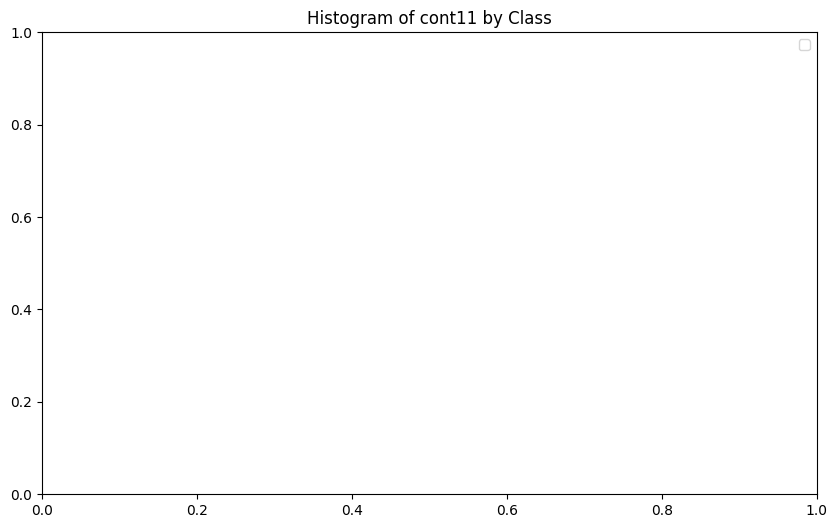

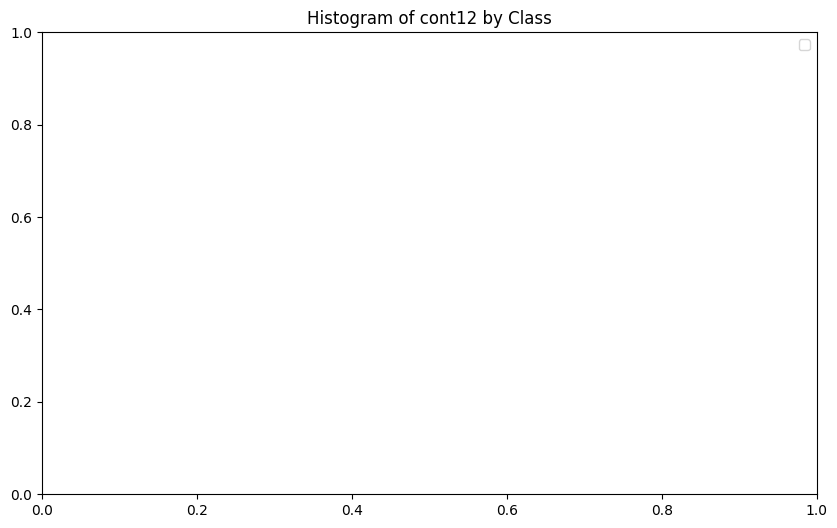

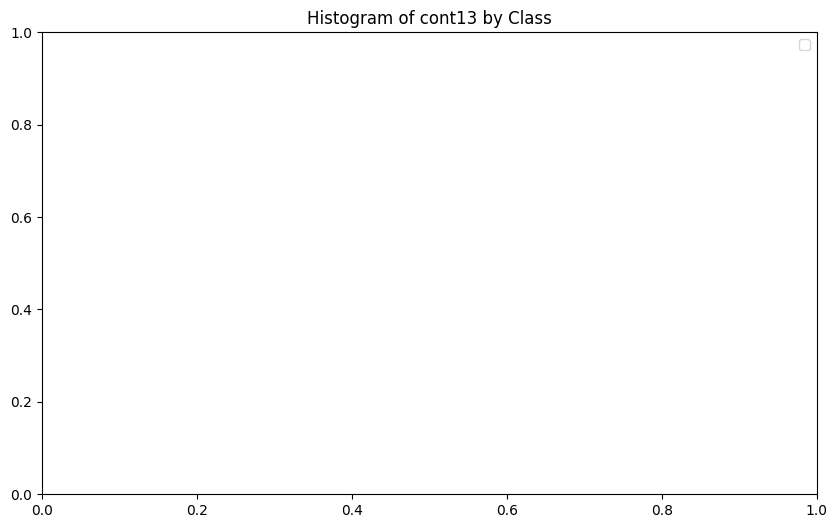

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the data by target class (assuming target column is 'cat0')
class_0 = df[df['cat0'] == 0]
class_1 = df[df['cat0'] == 1]

# Plot histograms for each numerical feature
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(class_0[column], kde=True, color='blue', label='Class 0', bins=30)
    sns.histplot(class_1[column], kde=True, color='red', label='Class 1', bins=30)
    plt.title(f'Histogram of {column} by Class')
    plt.legend()
    plt.show()


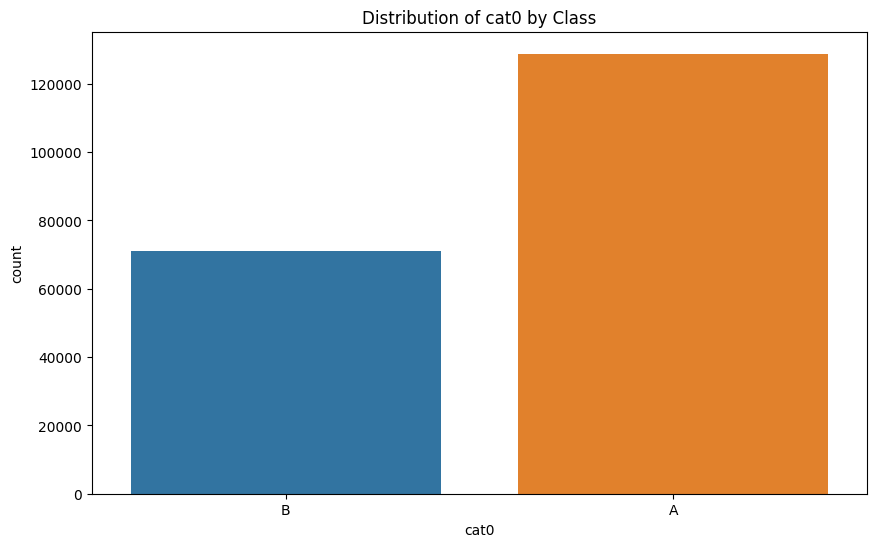

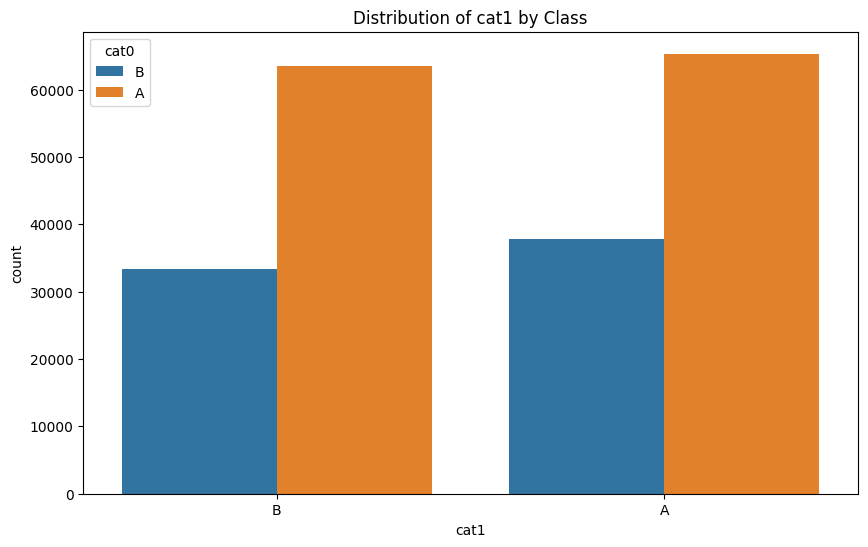

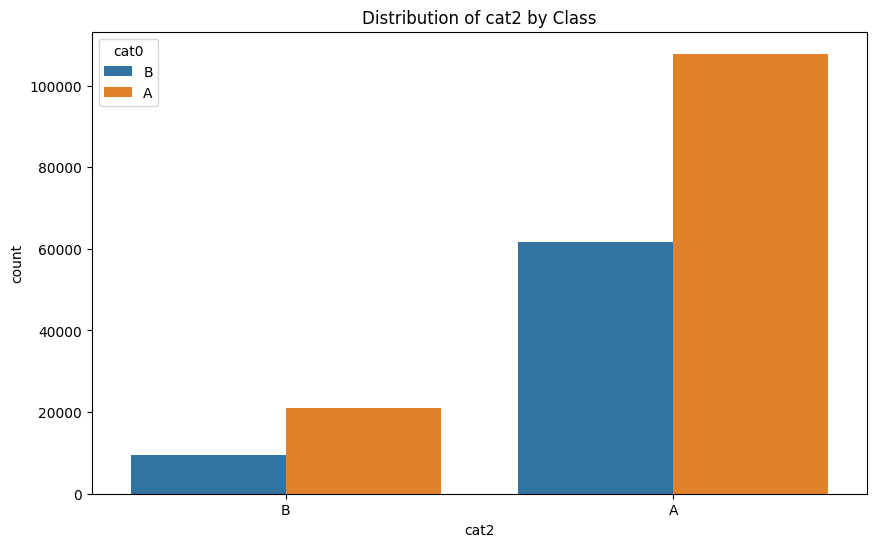

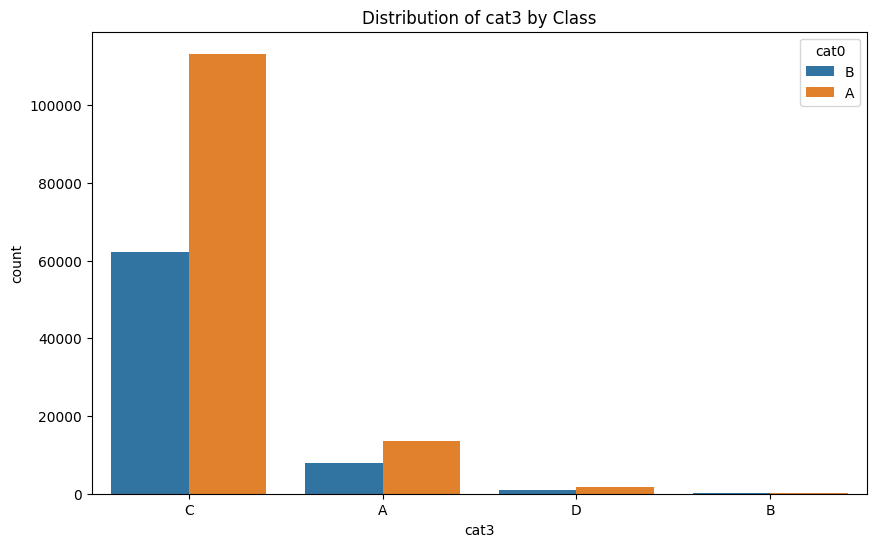

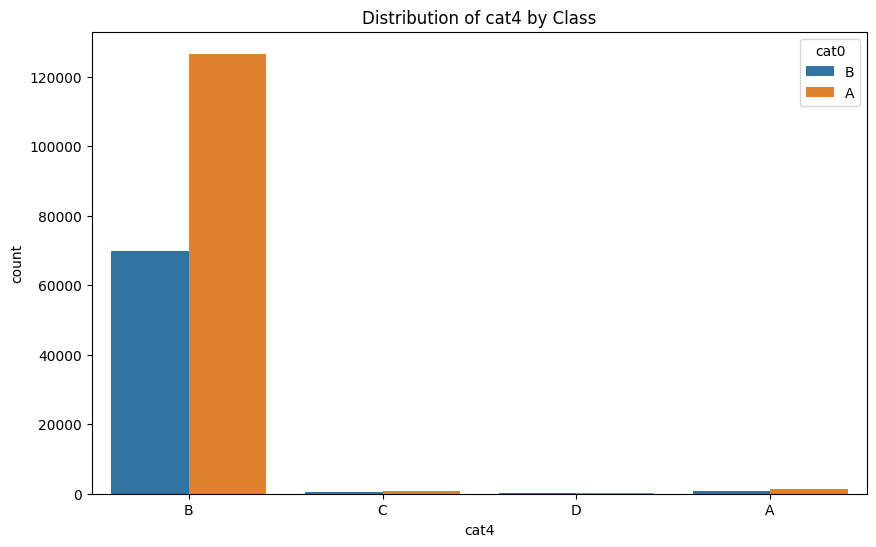

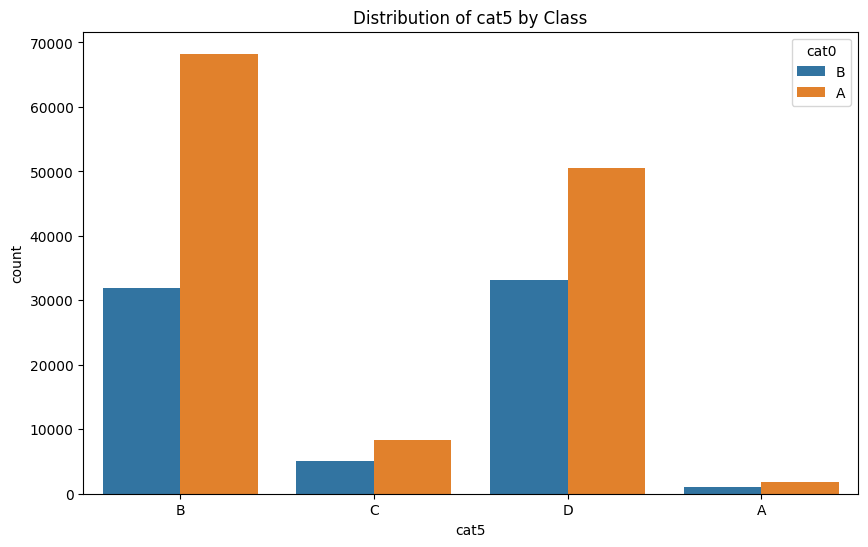

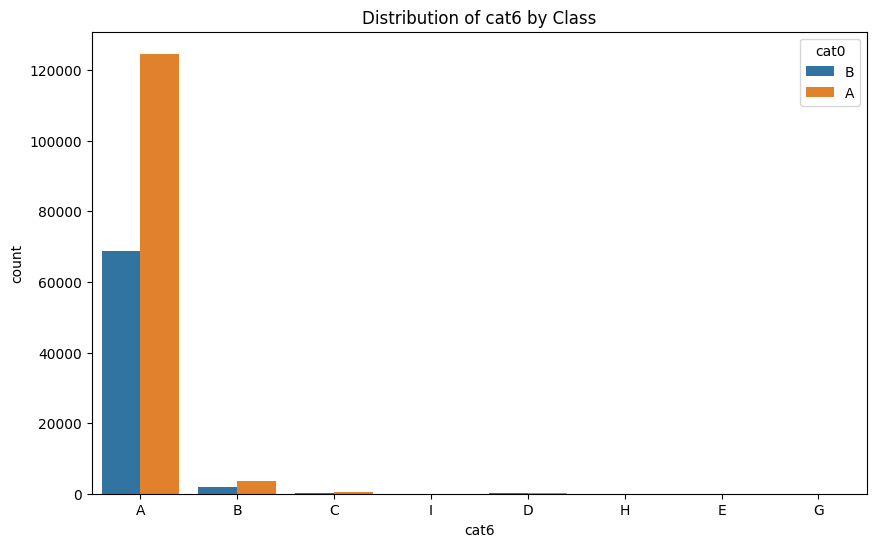

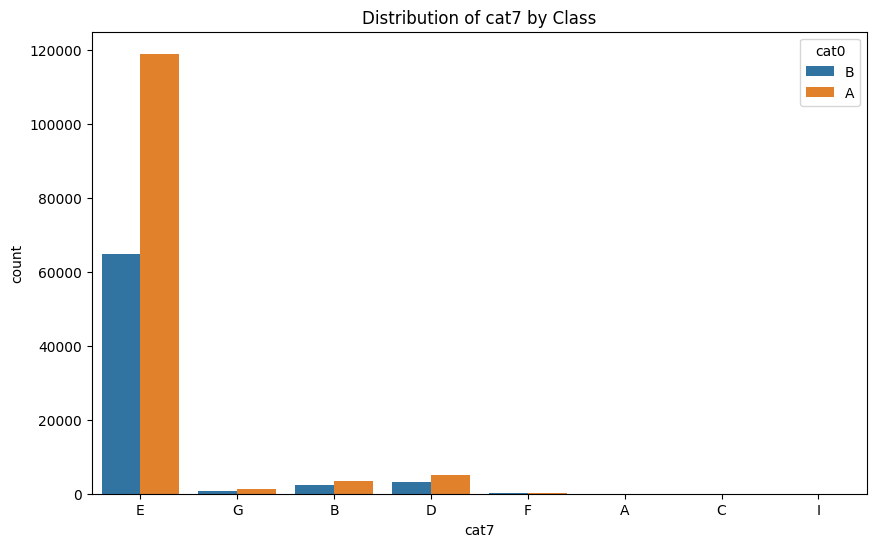

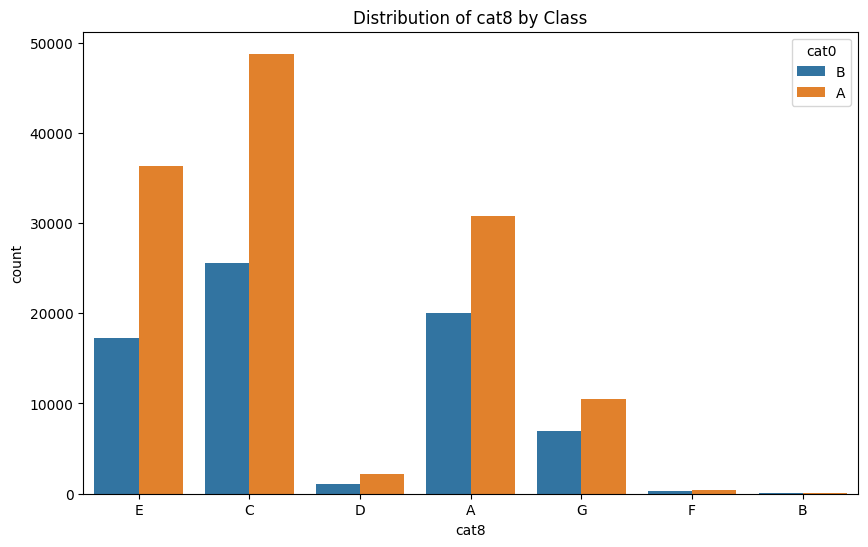

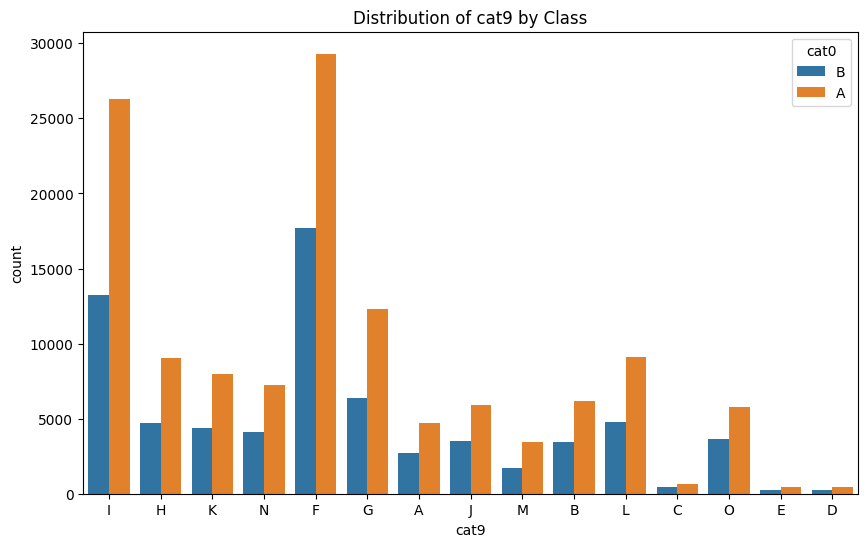

In [21]:
# Categorical features columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='cat0', data=df)
    plt.title(f'Distribution of {column} by Class')
    plt.show()


Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13'],
      dtype='object')
   id cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8  ...     cont4     cont5  \
0   0    B    B    B    C    B    B    A    E    E  ...  0.476739  0.376350   
1   5    A    B    A    C    B    C    A    E    C  ...  0.285509  0.860046   
2  15    B    A    A    A    B    B    A    E    D  ...  0.697272  0.683600   
3  16    B    B    A    C    B    D    A    E    A  ...  0.719306  0.777890   
4  17    B    B    A    C    B    C    A    E    C  ...  0.313032  0.431007   

      cont6     cont7     cont8     cont9    cont10    cont11    cont12  \
0  0.337884  0.321832  0.445212  0.290258  0.244476  0.087914  0.301831   
1  0.798712  0.835961  0.391657  0.288276  0.549568  0.905097  0.850684   
2  0.404089  0.879379  0.275549  

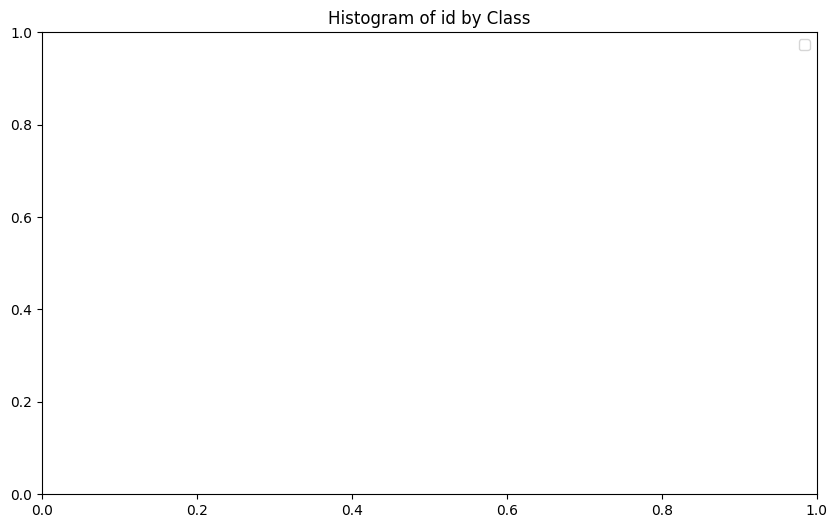

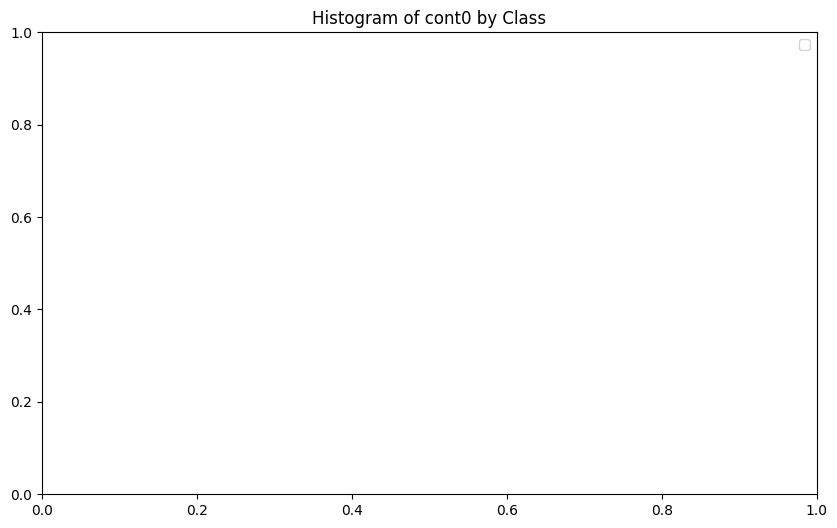

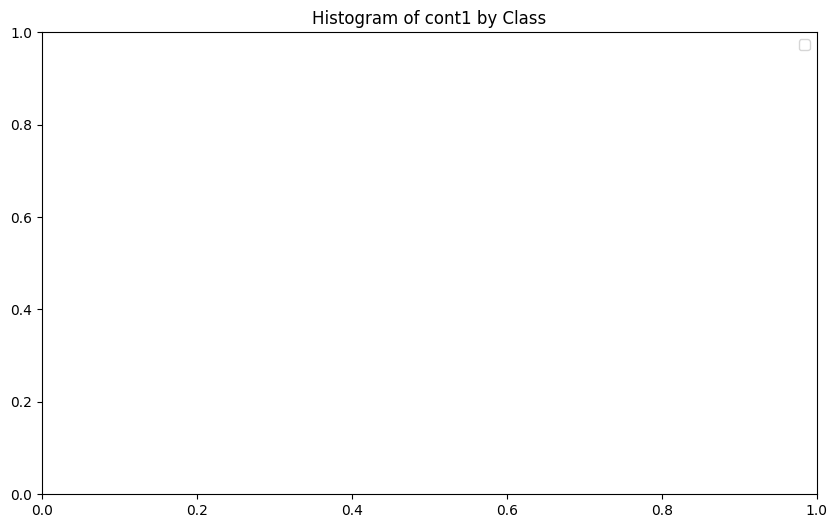

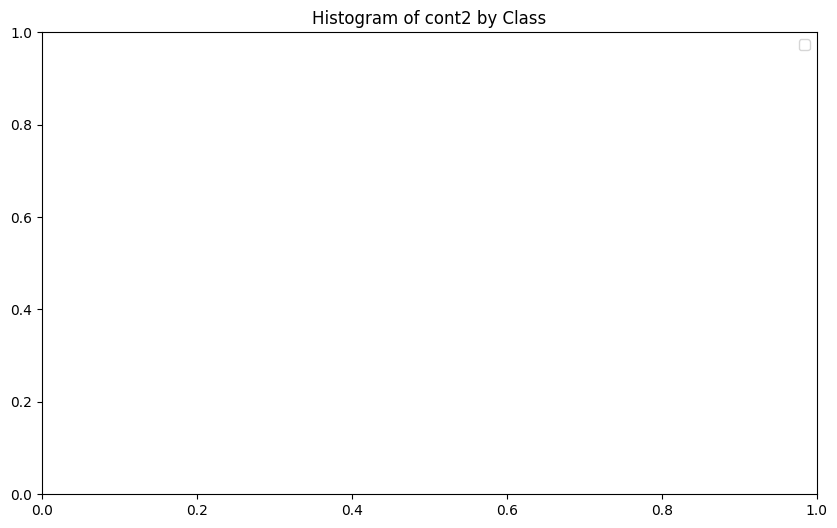

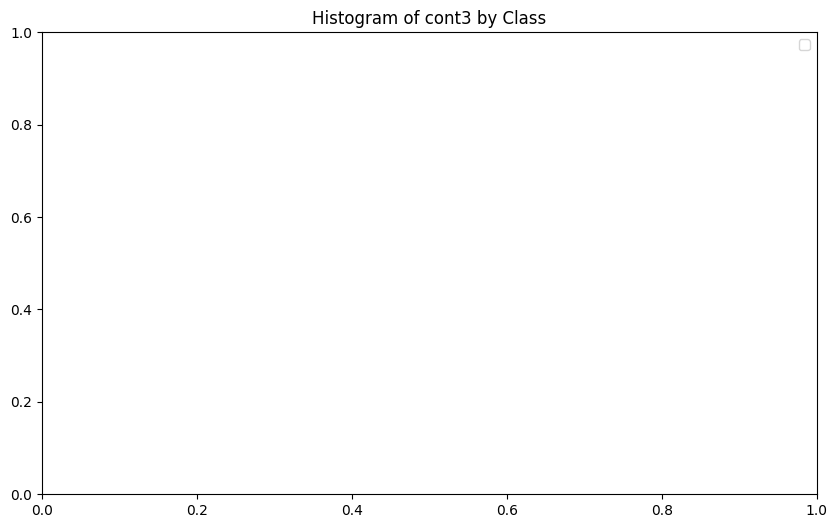

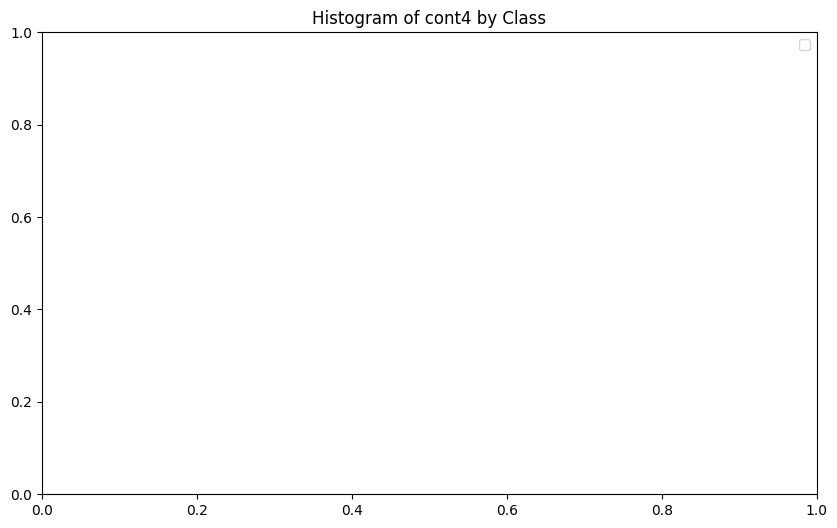

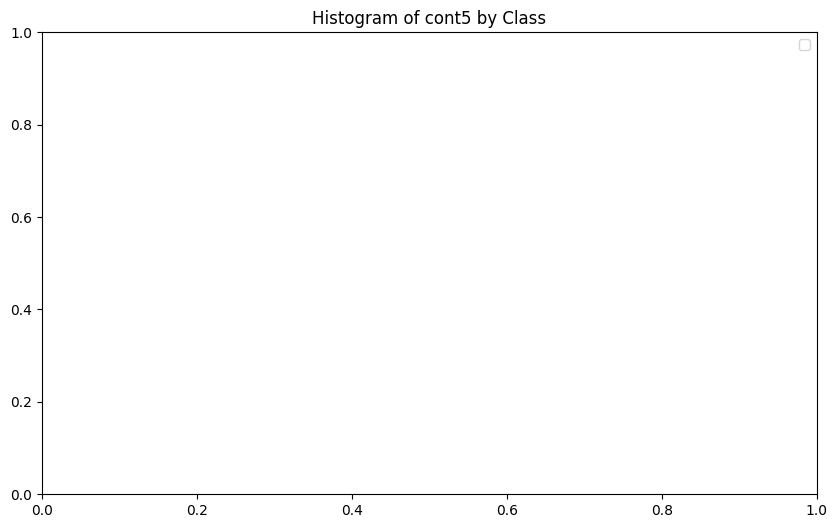

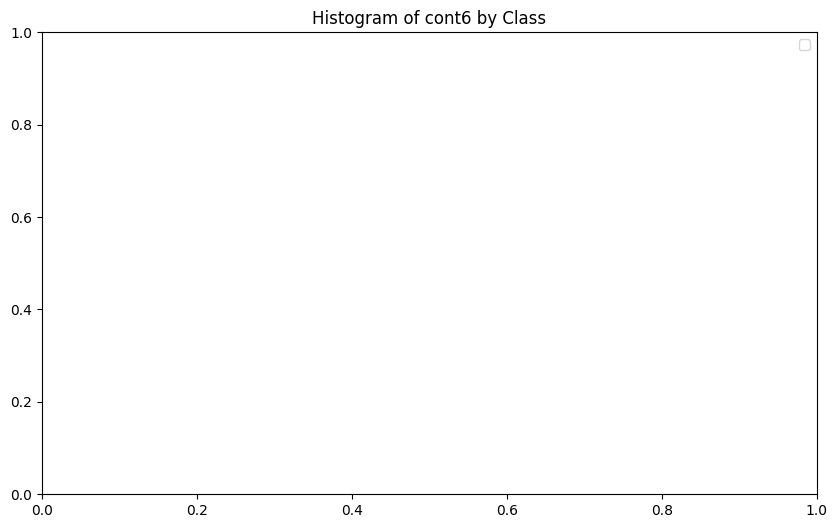

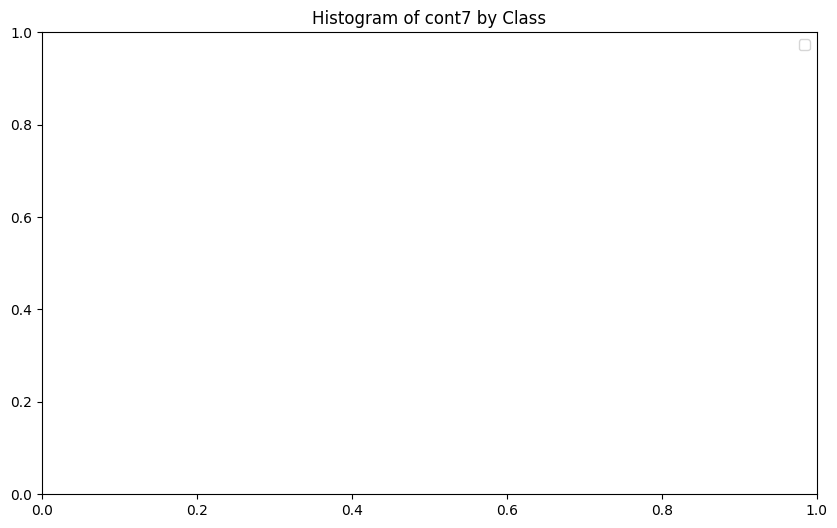

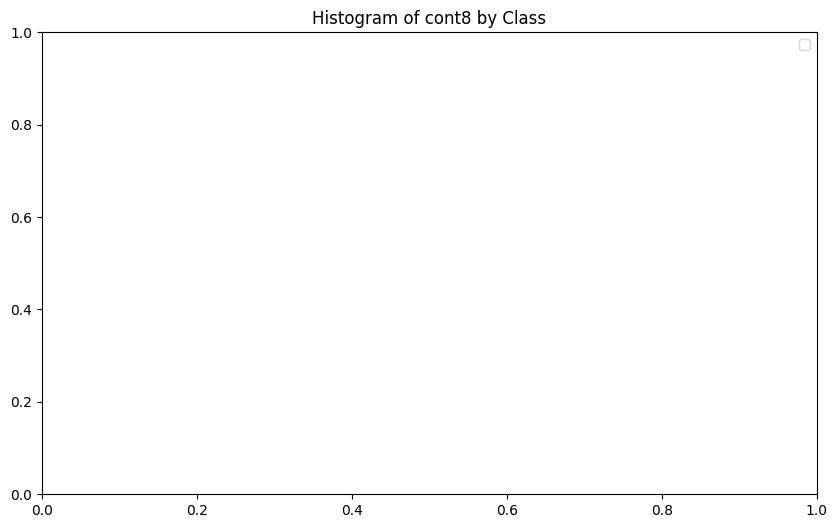

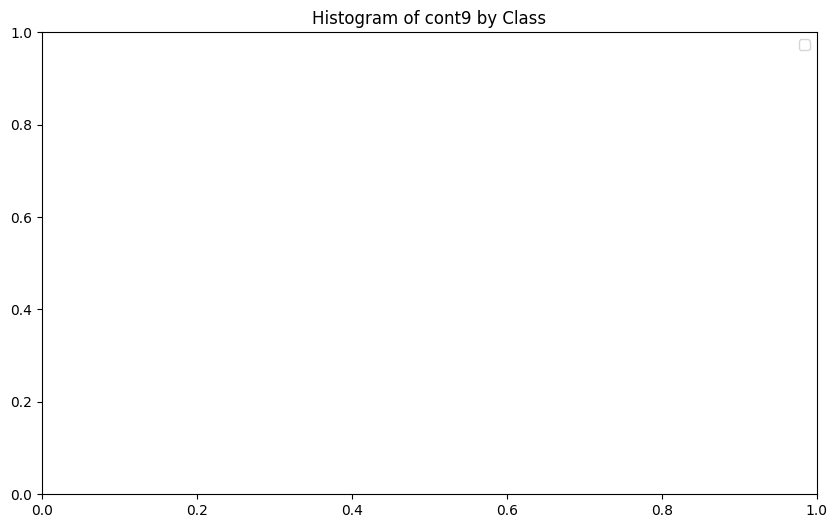

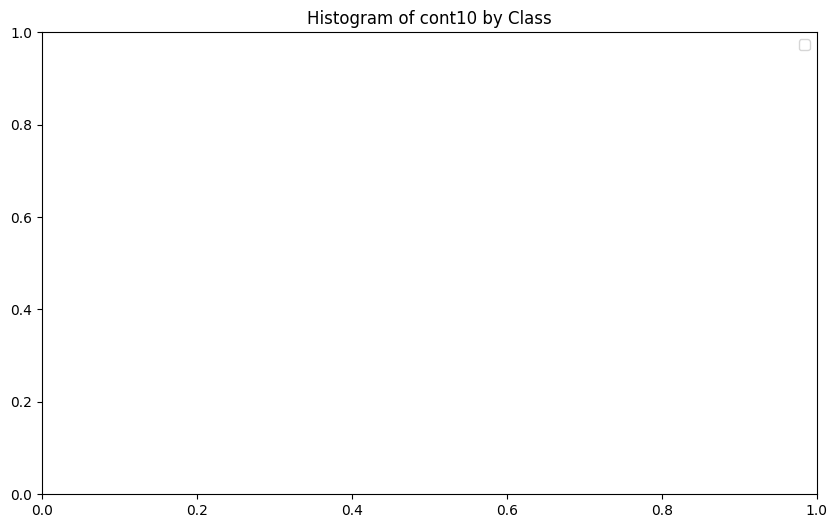

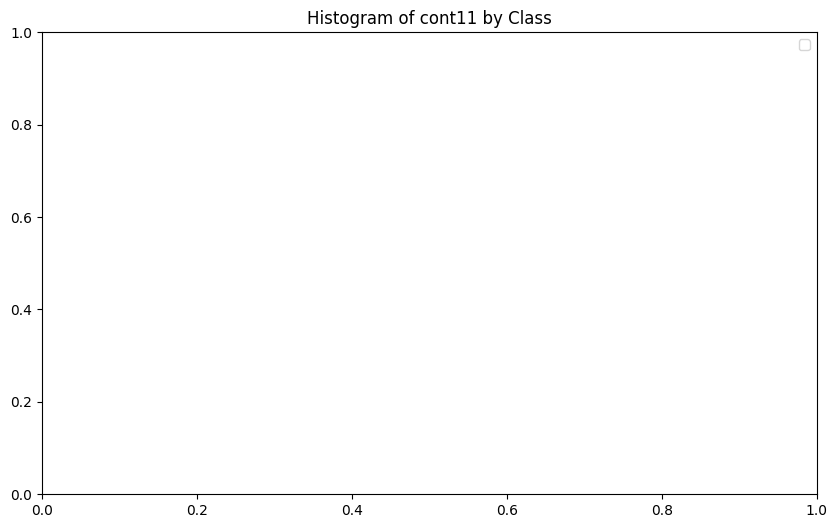

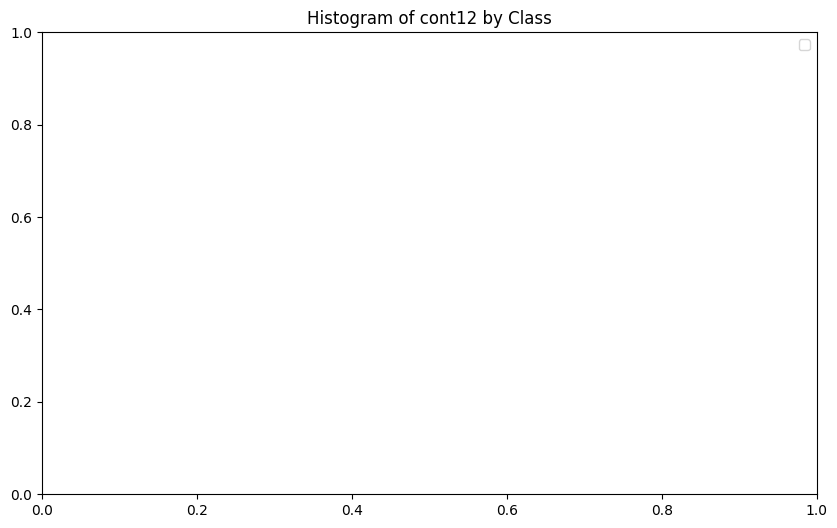

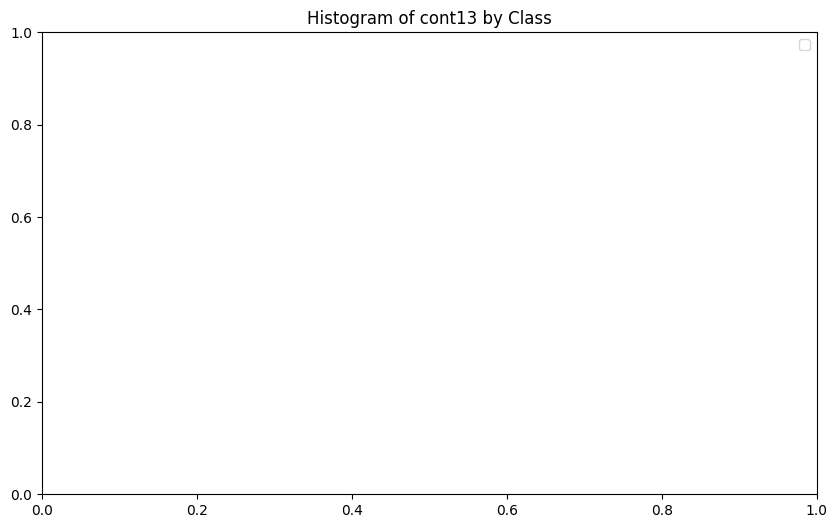

In [23]:
# Check all column names in the dataset
print(df.columns)
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()
# Check the first few rows of the dataset to confirm the structure
print(df.head())

# If the target column is present, ensure it is of the correct type (e.g., binary)
print(df['cat0'].dtype)
# Now that we've confirmed the correct target column (cat0 in this case), proceed with visualization
class_distribution = df['cat0'].value_counts()
print(class_distribution)

# Plot histograms for each numerical feature, grouped by the target (cat0)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['cat0'] == 0][column], kde=True, color='blue', label='Class 0', bins=30)
    sns.histplot(df[df['cat0'] == 1][column], kde=True, color='red', label='Class 1', bins=30)
    plt.title(f'Histogram of {column} by Class')
    plt.legend()
    plt.show()


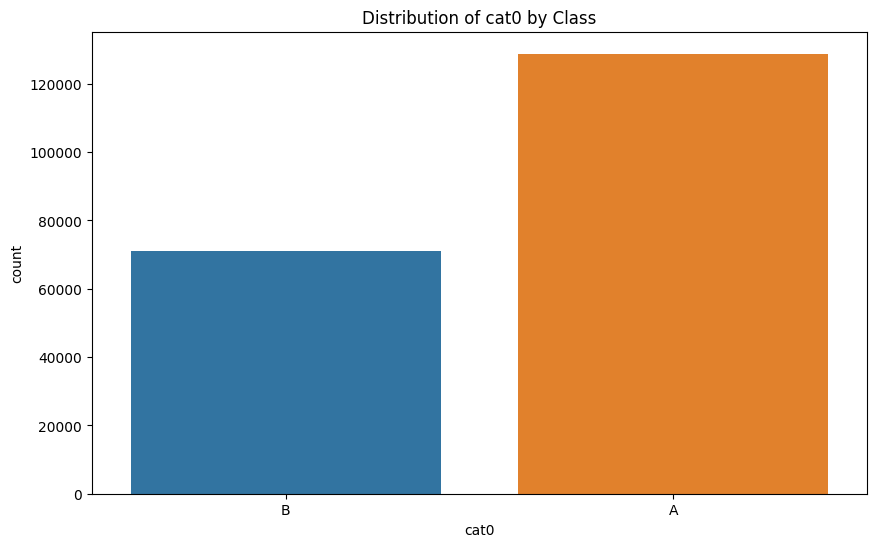

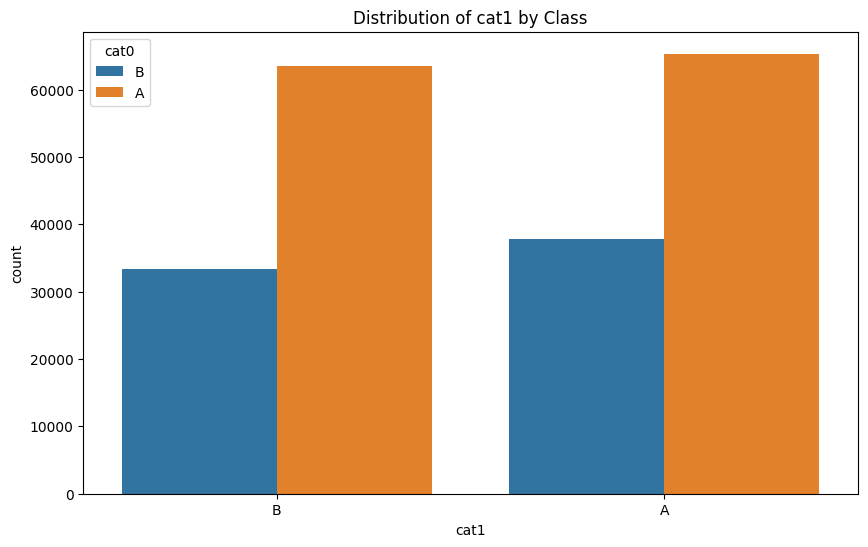

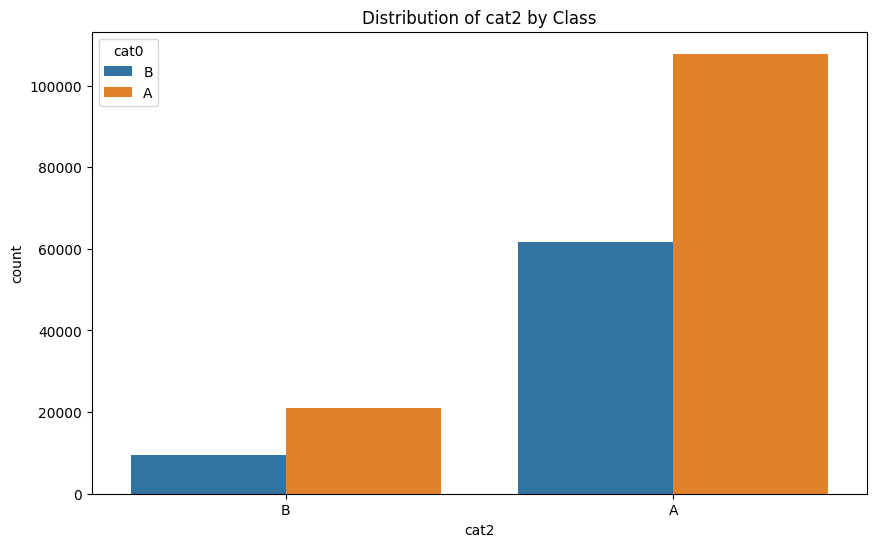

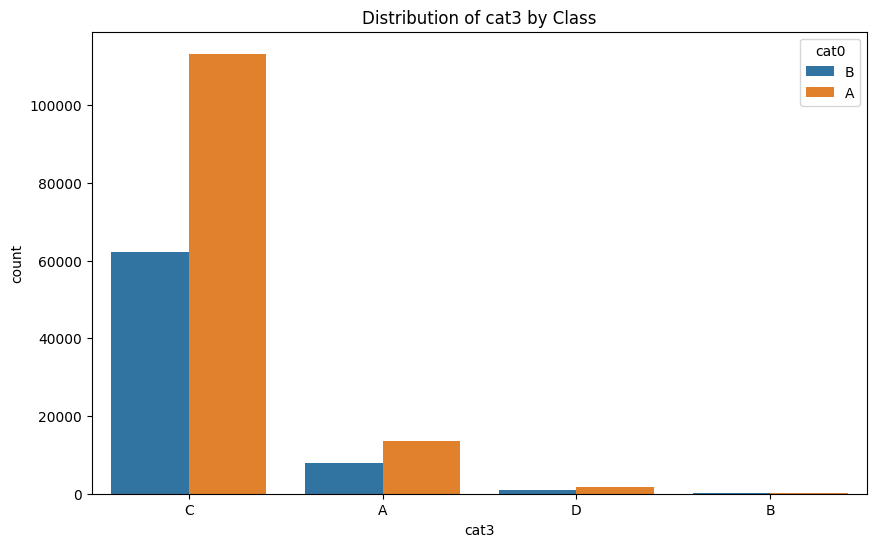

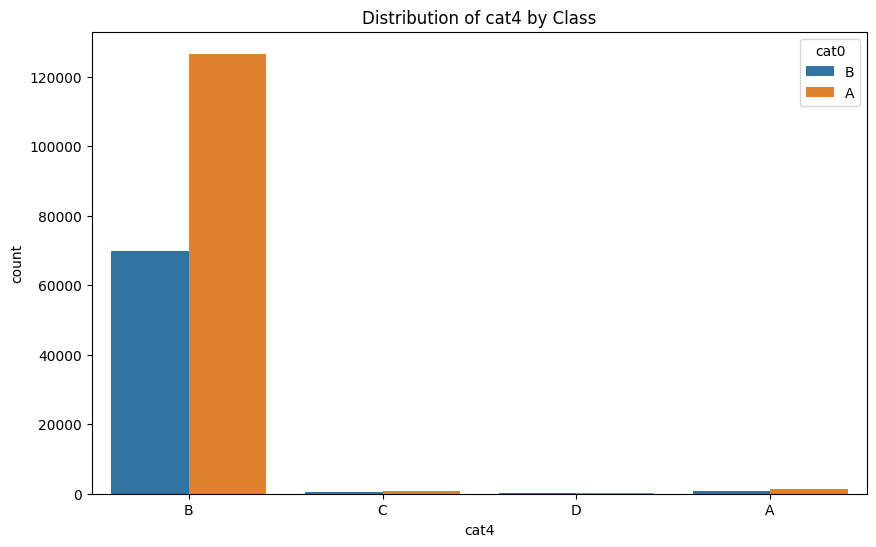

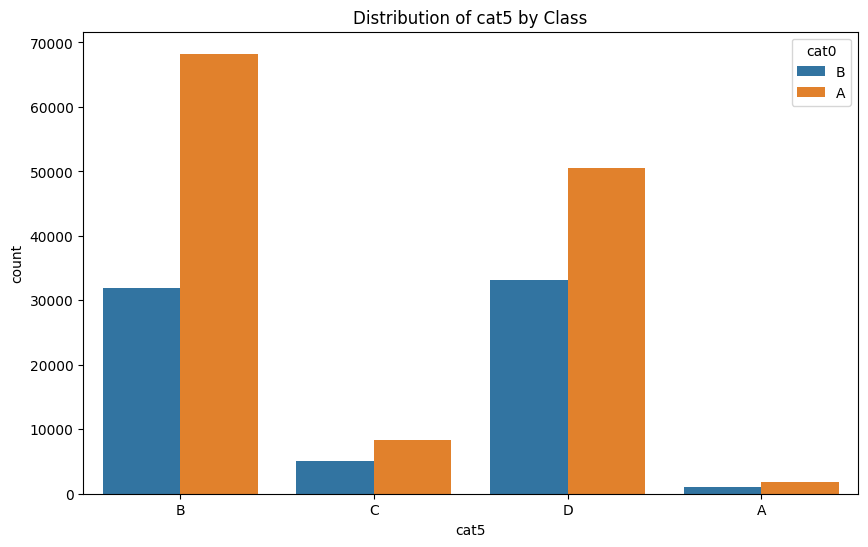

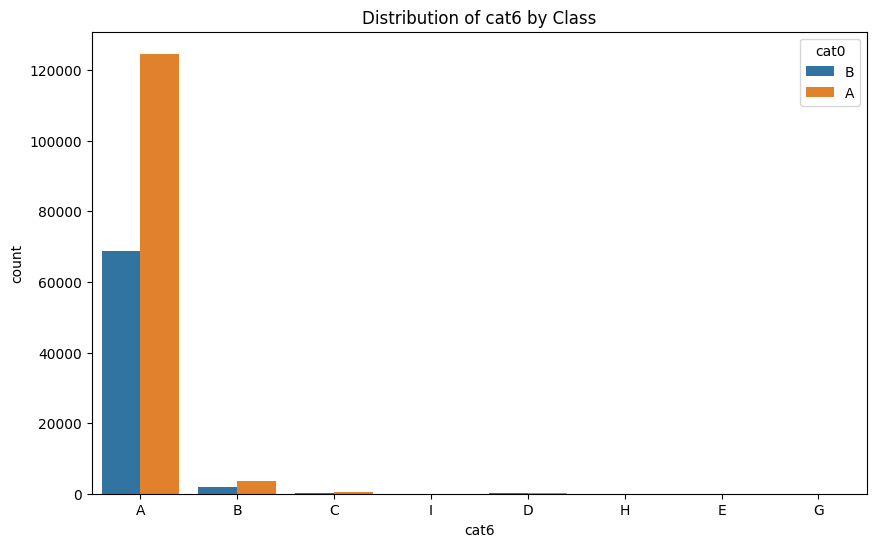

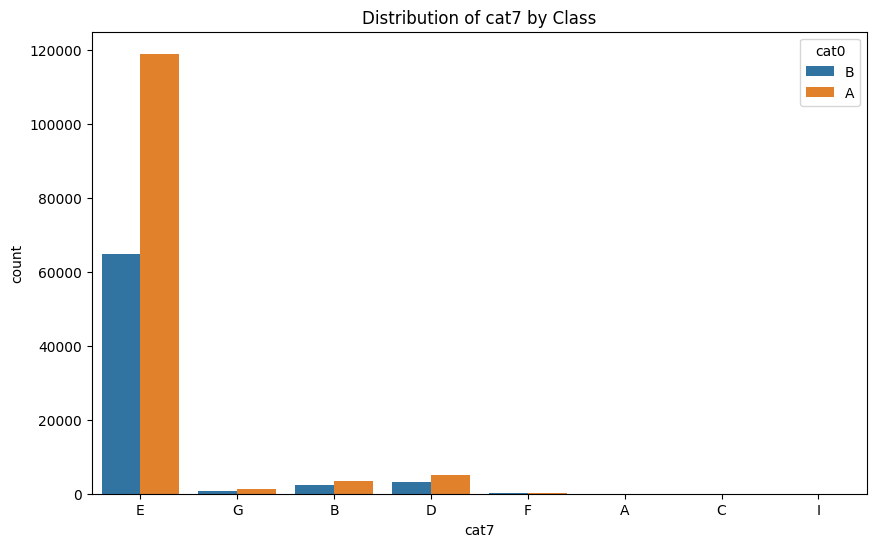

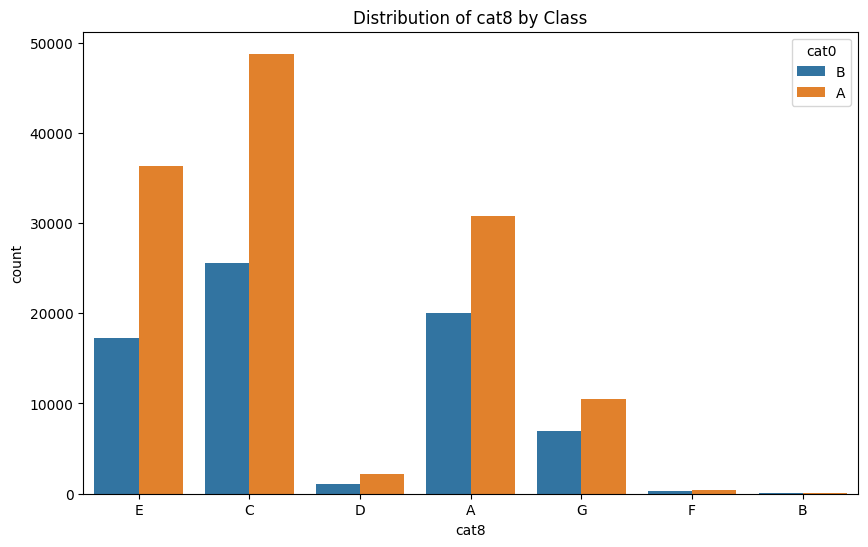

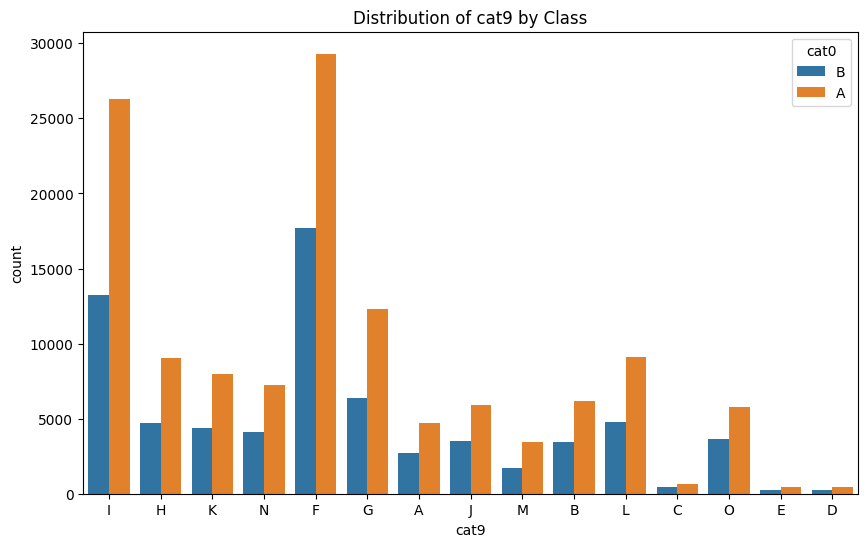

In [24]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot bar charts for each categorical feature
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='cat0')  # Replace 'cat0' with your target column
    plt.title(f'Distribution of {column} by Class')
    plt.show()


After visualizing the data, look for the following patterns to identify the most promising features for your machine learning task:

Distinct Separation Between Classes: Features where the distribution of values for Class 0 and Class 1 (or for each defined class in regression) is significantly different are likely more informative for the model.
High Variability: Features that exhibit a large spread or variability in their values across the classes may be more useful for prediction.

## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature.
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [27]:
import numpy as np
import pandas as pd

# Sample DataFrame (you can replace this with your actual DataFrame)
# df = pd.DataFrame(...)

# Identify numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Fill NaN values in numeric columns with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill NaN values in non-numeric columns with the mode (most frequent value)
df[non_numeric_columns] = df[non_numeric_columns].fillna(df[non_numeric_columns].mode().iloc[0])

# Now df should have no NaN values and should not throw the error.


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [29]:
df = pd.get_dummies(df, drop_first=True)  # Drop the first column to avoid multicollinearity


In [30]:
# Example of handling missing values by filling with mean for numerical columns
df.fillna(df.mean(), inplace=True)

# One-hot encoding for categorical features
df = pd.get_dummies(df, drop_first=True)

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()


In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'cont0'}>,
        <Axes: title={'center': 'cont1'}>,
        <Axes: title={'center': 'cont2'}>],
       [<Axes: title={'center': 'cont3'}>,
        <Axes: title={'center': 'cont4'}>,
        <Axes: title={'center': 'cont5'}>,
        <Axes: title={'center': 'cont6'}>],
       [<Axes: title={'center': 'cont7'}>,
        <Axes: title={'center': 'cont8'}>,
        <Axes: title={'center': 'cont9'}>,
        <Axes: title={'center': 'cont10'}>],
       [<Axes: title={'center': 'cont11'}>,
        <Axes: title={'center': 'cont12'}>,
        <Axes: title={'center': 'cont13'}>, <Axes: >]], dtype=object)

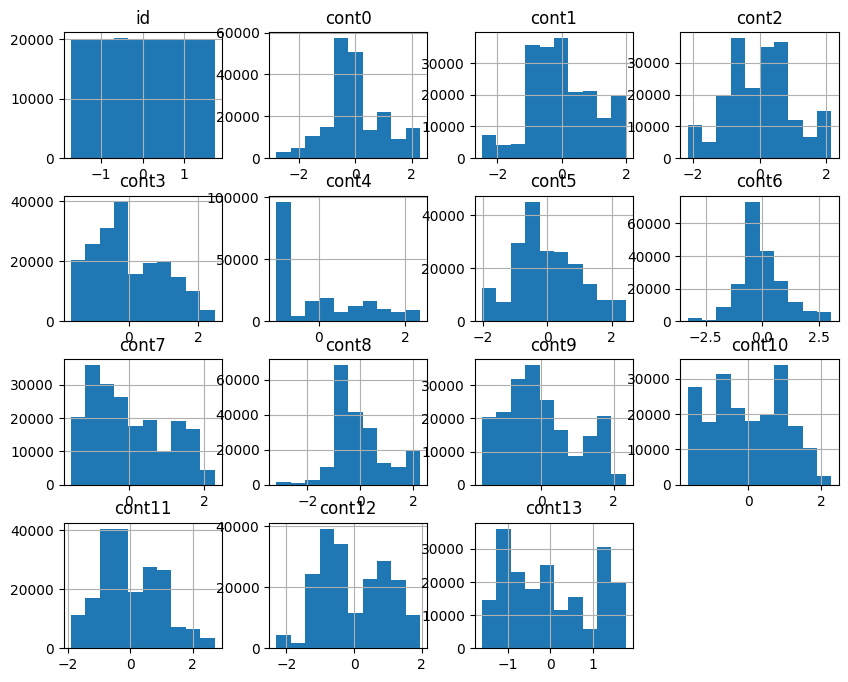

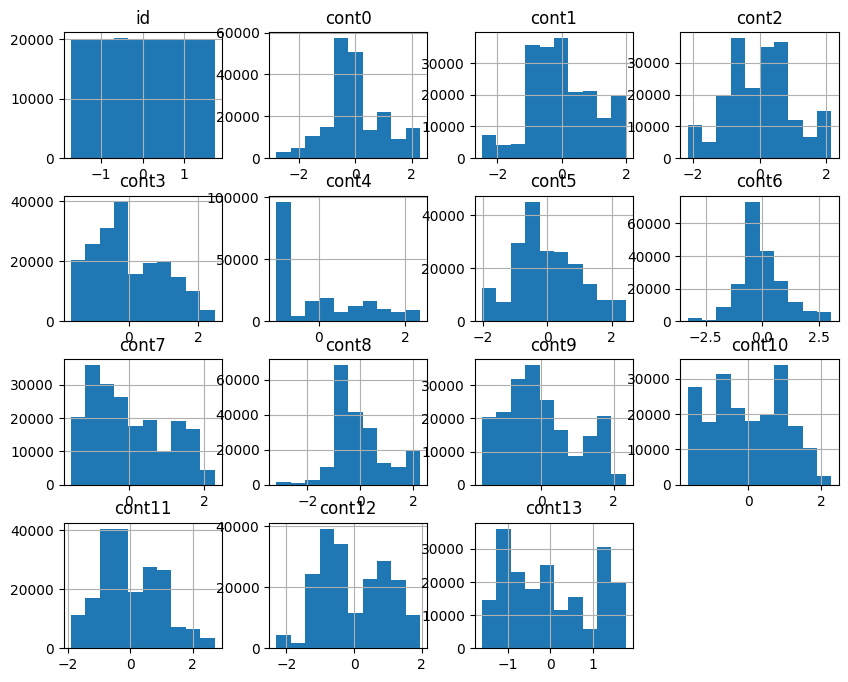

In [32]:
# Before scaling
df[numerical_cols].hist(figsize=(10, 8))

# After scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols].hist(figsize=(10, 8))


## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm to work. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.

### Apply ML to the challenge test set

* Once trained, apply the ML algorithm the the test dataset and generate the submission file.


In [35]:
# Identify the correct target column, assuming it's 'cat0_B'
X = df.drop(columns=['cat0_B'])  # Drop the correct target column from the features
y = df['cat0_B']  # Assign the correct target column to 'y'


In [36]:
# Check the column names
print(df.columns)

# Assuming 'cat0_B' is your target column
X = df.drop(columns=['cat0_B'])  # Drop the target column from features
y = df['cat0_B']  # Assign the target column to 'y'


Index(['id', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'cat0_B', 'cat1_B', 'cat2_B', 'cat3_B', 'cat3_C', 'cat3_D', 'cat4_B',
       'cat4_C', 'cat4_D', 'cat5_B', 'cat5_C', 'cat5_D', 'cat6_B', 'cat6_C',
       'cat6_D', 'cat6_E', 'cat6_G', 'cat6_H', 'cat6_I', 'cat7_B', 'cat7_C',
       'cat7_D', 'cat7_E', 'cat7_F', 'cat7_G', 'cat7_I', 'cat8_B', 'cat8_C',
       'cat8_D', 'cat8_E', 'cat8_F', 'cat8_G', 'cat9_B', 'cat9_C', 'cat9_D',
       'cat9_E', 'cat9_F', 'cat9_G', 'cat9_H', 'cat9_I', 'cat9_J', 'cat9_K',
       'cat9_L', 'cat9_M', 'cat9_N', 'cat9_O'],
      dtype='object')


In [38]:
# Drop columns that are not needed for the model
# Assuming 'id' is a row identifier and is not useful for prediction
X = df.drop(columns=['id', 'cat0_B'])  # Drop the target column 'cat0_B' and 'id'
y = df['cat0_B']  # Assign the target column to 'y'


In [39]:
from sklearn.model_selection import train_test_split

# Split the data into training (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [41]:
from sklearn.metrics import accuracy_score

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')


Validation Accuracy: 0.6427


In [42]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Prepare the submission file (if this is for a Kaggle challenge)
import pandas as pd
submission = pd.DataFrame({
    'id': df.loc[X_test.index, 'id'],  # Ensure the 'id' column is part of the submission
    'prediction': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False)


In [43]:
from sklearn.metrics import log_loss

# Calculate Log Loss on the validation set
val_log_loss = log_loss(y_val, model.predict_proba(X_val))  # Using predict_proba for Log Loss
print(f'Validation Log Loss: {val_log_loss:.4f}')


Validation Log Loss: 0.6479


In [44]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# If required, prepare a DataFrame for submission (for Kaggle or similar)
import pandas as pd

# Assuming 'id' is needed for the submission
submission = pd.DataFrame({
    'id': df.loc[X_test.index, 'id'],  # Ensure the 'id' column is part of the submission
    'prediction': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
